# INTRODUCTION

# Diabetes Risk Prediction Using Machine Learning

In this project, we aim to predict the risk of diabetes in patients based on various health metrics using different machine learning models. The dataset contains information such as age, gender, BMI, blood pressure, cholesterol levels, and glucose levels. We will preprocess the data, visualize it, and build multiple machine learning models to find the best one for predicting diabetes risk.

The steps involved in this project are:
1. Importing the necessary libraries and dataset.
2. Understanding and preprocessing the data.
3. Visualizing the data to gain insights.
4. Building and evaluating different machine learning models.
5. Identifying the best model and analyzing feature importance.

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# IMPORTING DATA

In [61]:
df = pd.read_csv('D:\\DSML\\project\\diabetes_data.csv')
df

,age,gender,bmi,bmi_category,systolic,diastolic,blood_pressure_category,cholesterol,cholesterol_category,glucose,diabetes_probability
0,55,Female,29.59,Overweight,112.0,89.5,Hypertension Stage 1,247,High,139,0.65
1,34,Male,30.68,Obesity,106.0,115.0,Hypertension Stage 2,255,High,101,0.60
2,26,Male,15.96,Underweight,96.0,97.0,Hypertension Stage 2,234,Borderline high,97,0.15
3,63,Male,15.61,Underweight,109.6,115.3,Hypertension Stage 2,261,High,143,0.70
4,37,Male,41.54,Obesity,110.0,103.0,Hypertension Stage 2,226,Borderline high,115,0.50
...,...,...,...,...,...,...,...,...,...,...,...
9995,81,Male,18.44,Underweight,111.2,97.1,Hypertension Stage 2,247,High,137,0.70
9996,29,Male,37.29,Obesity,112.0,76.0,Normal,196,Normal,87,0.20
9997,84,Female,32.15,Obesity,114.8,92.4,Hypertension Stage 2,300,High,129,0.90
9998,76,Female,31.79,Obesity,117.2,125.6,Hypertension Stage 2,223,Borderline high,131,0.80


# UNDERSTANDING THE DATA

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      10000 non-null  int64  
 1   gender                   10000 non-null  object 
 2   bmi                      10000 non-null  float64
 3   bmi_category             10000 non-null  object 
 4   systolic                 10000 non-null  float64
 5   diastolic                10000 non-null  float64
 6   blood_pressure_category  10000 non-null  object 
 7   cholesterol              10000 non-null  int64  
 8   cholesterol_category     10000 non-null  object 
 9   glucose                  10000 non-null  int64  
 10  diabetes_probability     10000 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 859.5+ KB


In [63]:
df.describe()

,age,bmi,systolic,diastolic,cholesterol,glucose,diabetes_probability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,54.062300,26.309132,106.052700,95.717600,228.748600,120.525300,0.489040
std,21.058294,8.396257,7.207495,17.863035,35.667787,21.095224,0.231504
min,18.000000,11.080000,90.000000,60.000000,150.000000,70.000000,0.000000
25%,36.000000,19.870000,100.600000,80.400000,202.000000,105.000000,0.300000
50%,55.000000,25.095000,106.000000,95.700000,229.000000,121.000000,0.500000
75%,72.000000,31.382500,111.400000,111.000000,255.000000,136.000000,0.650000
max,90.000000,53.210000,125.000000,132.000000,300.000000,182.000000,0.900000


In [64]:
df.isnull().sum()

age                        0
gender                     0
bmi                        0
bmi_category               0
systolic                   0
diastolic                  0
blood_pressure_category    0
cholesterol                0
cholesterol_category       0
glucose                    0
diabetes_probability       0
dtype: int64

# VISUALIZATION

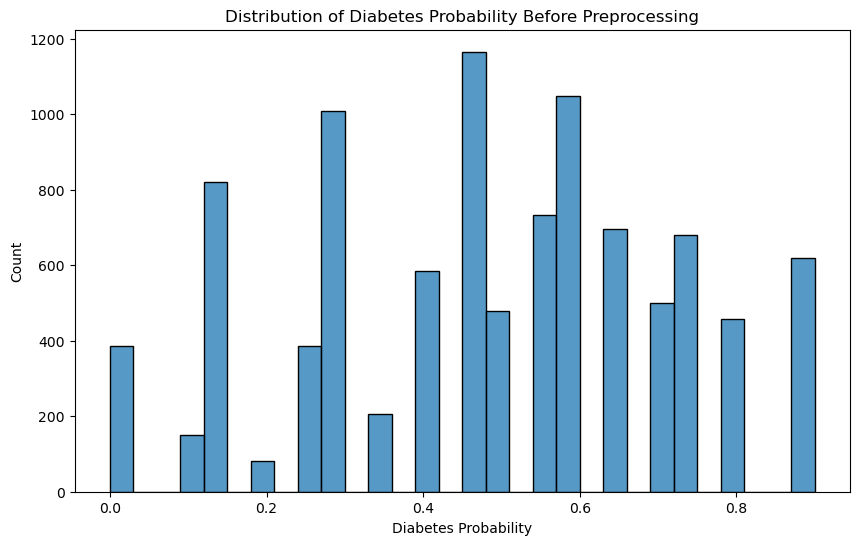

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df['diabetes_probability'], bins=30, )
plt.title("Distribution of Diabetes Probability Before Preprocessing")
plt.xlabel("Diabetes Probability")
plt.ylabel("Count")
plt.show()

# DATA PROCESSING

In [66]:
df['diabetes_risk'] = np.where(df['diabetes_probability'] >= 0.5, 1, 0)

In [67]:
df.drop(columns=['diabetes_probability'], inplace=True)

# VISUALIZATION AFTER PREPROCESSING

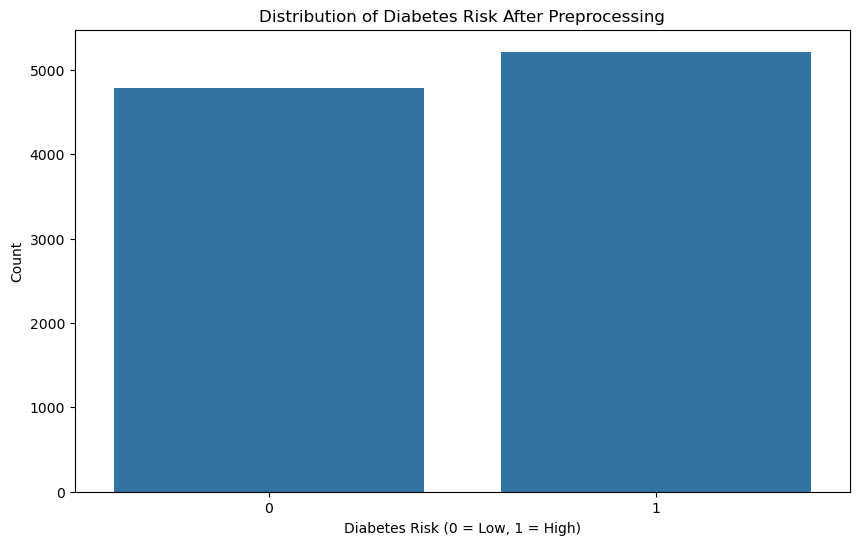

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['diabetes_risk'])
plt.title("Distribution of Diabetes Risk After Preprocessing")
plt.xlabel("Diabetes Risk (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.show()

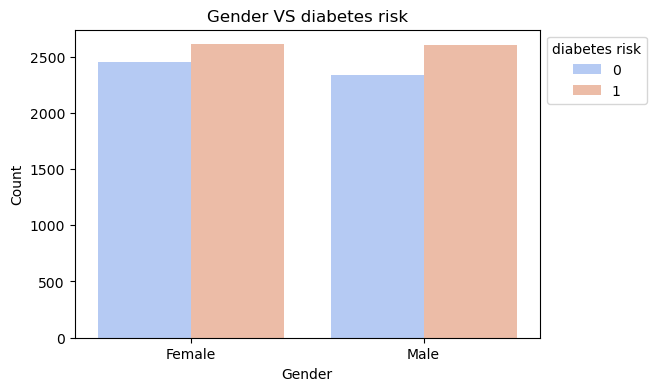

In [69]:
plt.figure(figsize=(6, 4))
sns.countplot(x="gender", hue="diabetes_risk", data=df, palette="coolwarm")
plt.title("Gender VS diabetes risk")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="diabetes risk", bbox_to_anchor=(1, 1))
plt.show()

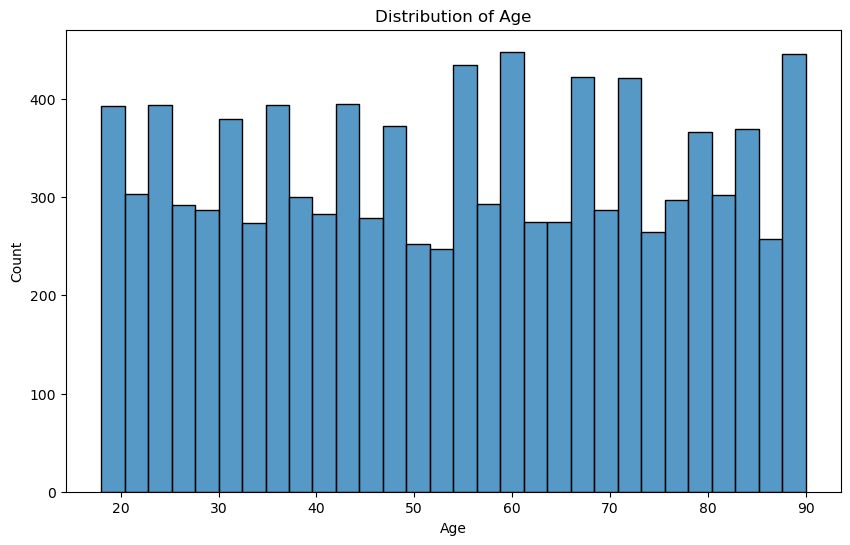

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# ENCODING

In [71]:
categorical_columns = ['gender', 'bmi_category', 'blood_pressure_category', 'cholesterol_category']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [72]:
df.head(10)

,age,gender,bmi,bmi_category,systolic,diastolic,blood_pressure_category,cholesterol,cholesterol_category,glucose,diabetes_risk
0,55,0,29.59,2,112.0,89.5,1,247,1,139,1
1,34,1,30.68,1,106.0,115.0,2,255,1,101,1
2,26,1,15.96,3,96.0,97.0,2,234,0,97,0
3,63,1,15.61,3,109.6,115.3,2,261,1,143,1
4,37,1,41.54,1,110.0,103.0,2,226,0,115,1
5,79,1,20.63,0,112.8,98.9,2,211,0,143,1
6,81,1,15.05,3,104.2,68.1,3,274,1,101,0
7,46,0,42.74,1,106.2,108.6,2,241,1,155,1
8,47,0,31.49,1,107.4,66.7,3,260,1,93,0
9,81,1,16.00,3,110.2,73.1,3,202,0,89,0


In [73]:
df.corr()

,age,gender,bmi,bmi_category,systolic,diastolic,blood_pressure_category,cholesterol,cholesterol_category,glucose,diabetes_risk
age,1.000000,-0.000618,0.004303,-0.010389,0.442549,0.090589,-0.058638,0.218889,-0.067808,0.289023,0.324099
gender,-0.000618,1.000000,0.005026,-0.006438,0.339825,0.054140,-0.031590,-0.000376,0.000219,0.001858,0.011088
bmi,0.004303,0.005026,1.000000,-0.261999,0.558347,0.116801,-0.072809,0.439136,-0.132723,0.273656,0.491121
bmi_category,-0.010389,-0.006438,-0.261999,1.000000,0.082429,0.009332,-0.013348,-0.008017,-0.000375,-0.006887,0.014634
systolic,0.442549,0.339825,0.558347,0.082429,1.000000,0.153674,-0.104713,0.402785,-0.134537,0.319581,0.517143
diastolic,0.090589,0.054140,0.116801,0.009332,0.153674,1.000000,-0.322873,0.065127,-0.031940,0.281352,0.365566
blood_pressure_category,-0.058638,-0.031590,-0.072809,-0.013348,-0.104713,-0.322873,1.000000,-0.035416,0.000608,-0.081276,-0.112393
cholesterol,0.218889,-0.000376,0.439136,-0.008017,0.402785,0.065127,-0.035416,1.000000,-0.288386,0.239987,0.487223
cholesterol_category,-0.067808,0.000219,-0.132723,-0.000375,-0.134537,-0.031940,0.000608,-0.288386,1.000000,-0.077443,-0.107433
glucose,0.289023,0.001858,0.273656,-0.006887,0.319581,0.281352,-0.081276,0.239987,-0.077443,1.000000,0.618862


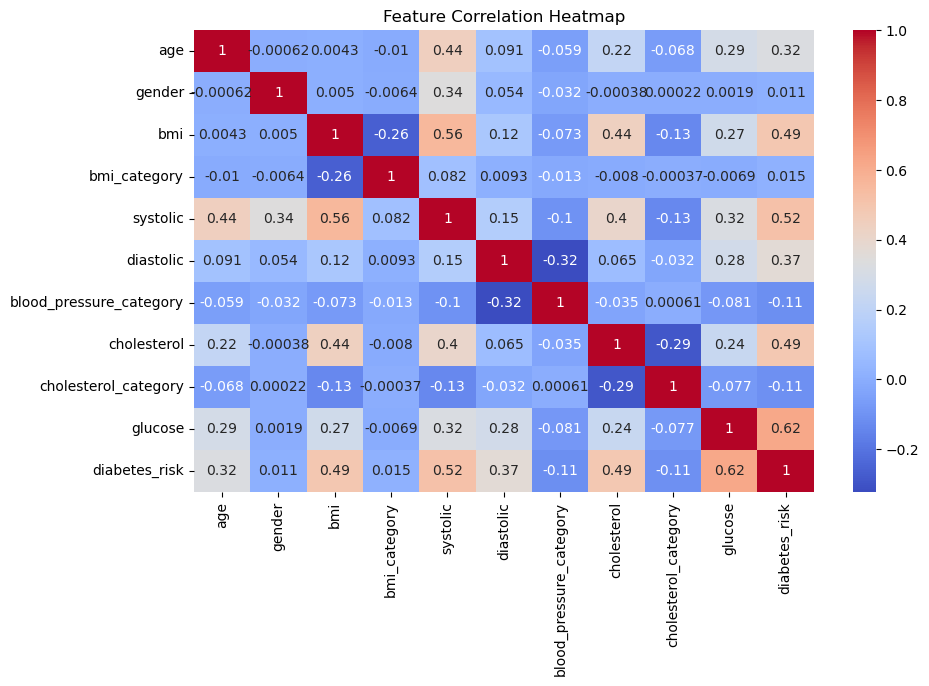

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# MODEL BUILDING

In [75]:
X = df.drop(columns=['diabetes_risk'])
y = df['diabetes_risk']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression


In [91]:
C_values = [0.01, 0.1, 1, 10, 100]

from sklearn.linear_model import LogisticRegression

for C in C_values:
    log_reg = LogisticRegression(C=C, random_state=42)
    log_reg.fit(X_train, y_train)
    y_pred_log_reg = log_reg.predict(X_test)
    accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
    report_log_reg = classification_report(y_test, y_pred_log_reg)
    print(f"Logistic Regression with C={C} Accuracy: {accuracy_log_reg* 100:.2f}%")
    print(f"Logistic Regression with C={C} Classification Report:\n", report_log_reg)
    print("Confusion Matrix :")
    print(confusion_matrix(y_test, y_pred_log_reg))
    print("------------------------------------------------------")

Logistic Regression with C=0.01 Accuracy: 91.25%
Logistic Regression with C=0.01 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       939
           1       0.92      0.92      0.92      1061

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

Confusion Matrix :
[[853  86]
 [ 89 972]]
------------------------------------------------------
Logistic Regression with C=0.1 Accuracy: 91.35%
Logistic Regression with C=0.1 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       939
           1       0.92      0.92      0.92      1061

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

Confusion Matrix :
[[853  86]
 [ 87 974]]

# Decision Tree

In [95]:
min_split_values = [2, 5, 10, 20, 50, 100]
from sklearn.tree import DecisionTreeClassifier

for x in min_split_values:
    decision_tree = DecisionTreeClassifier(min_samples_split=x, random_state=42)
    decision_tree.fit(X_train, y_train)
    y_pred_decision_tree = decision_tree.predict(X_test)
    accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
    report_tree = classification_report(y_test, y_pred_decision_tree)

    print(f"Decision Tree with min_samples_split={x} Accuracy: {accuracy_decision_tree* 100:.2f}%")
    print("Decision Tree Classification Report:\n", report_tree)
    print("Confusion Matrix :")
    print(confusion_matrix(y_test, y_pred_decision_tree))
    print("------------------------------------------------------")


Decision Tree with min_samples_split=2 Accuracy: 99.50%
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       939
           1       0.99      1.00      1.00      1061

    accuracy                           0.99      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      0.99      0.99      2000

Confusion Matrix :
[[ 930    9]
 [   1 1060]]
------------------------------------------------------
Decision Tree with min_samples_split=5 Accuracy: 99.35%
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       939
           1       0.99      1.00      0.99      1061

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix :
[[ 930    9]
 [   4 1057]]
-----------

# K-Nearest Neighbors

In [96]:
n_neighbors_values = [1, 3, 5, 7, 9, 11, 13, 15]
from sklearn.neighbors import KNeighborsClassifier

for n in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    report_knn = classification_report(y_test, y_pred_knn)
    print(f"K-Nearest Neighbors with n_neighbors={n} Accuracy: {accuracy_knn* 100:.2f}%")
    print("K-Nearest Neighbors Classification Report:\n", report_knn)
    print("Confusion Matrix :")
    print(confusion_matrix(y_test, y_pred_knn))
    print("------------------------------------------------------")



K-Nearest Neighbors with n_neighbors=1 Accuracy: 94.55%
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       939
           1       0.93      0.97      0.95      1061

    accuracy                           0.95      2000
   macro avg       0.95      0.94      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Confusion Matrix :
[[ 865   74]
 [  35 1026]]
------------------------------------------------------
K-Nearest Neighbors with n_neighbors=3 Accuracy: 95.65%
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       939
           1       0.94      0.98      0.96      1061

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

Confusion Matrix :
[[ 875   64]
 [  23 1038]]

# Support Vector Machine

In [97]:
gamma_values = [0.01, 0.1, 1,2 ]
from sklearn.svm import SVC
for gamma in gamma_values:
    svm = SVC(kernel='linear', gamma=gamma, random_state=42)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    report_svm = classification_report(y_test, y_pred_svm)
    print(f"SVM with gamma={gamma} Accuracy: {accuracy_svm* 100:.2f}%")
    print(f"SVM with gamma={gamma} Classification Report:\n", report_svm)
    print("Confusion Matrix :")
    print(confusion_matrix(y_test, y_pred_svm))
    print("------------------------------------------------------")

SVM with gamma=0.01 Accuracy: 91.15%
SVM with gamma=0.01 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       939
           1       0.92      0.92      0.92      1061

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

Confusion Matrix :
[[849  90]
 [ 87 974]]
------------------------------------------------------
SVM with gamma=0.1 Accuracy: 91.15%
SVM with gamma=0.1 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       939
           1       0.92      0.92      0.92      1061

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

Confusion Matrix :
[[849  90]
 [ 87 974]]
-----------------------------------------------

# Random Forest Classifier

In [98]:
n_estimators_values = [10, 50, 100, 500]
from sklearn.ensemble import RandomForestClassifier
for n_estimators in n_estimators_values:
    random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    random_forest.fit(X_train, y_train)
    y_pred_random_forest = random_forest.predict(X_test)
    accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
    report_random_forest = classification_report(y_test, y_pred_random_forest)
    print(f"Random Forest with n_estimators={n_estimators} Accuracy: {accuracy_random_forest* 100:.2f}%")
    print(f"Random Forest with n_estimators={n_estimators} Classification Report:\n", report_random_forest)
    print("Confusion Matrix :")
    print(confusion_matrix(y_test, y_pred_random_forest))
    print("------------------------------------------------------")

Random Forest with n_estimators=10 Accuracy: 99.80%
Random Forest with n_estimators=10 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       939
           1       1.00      1.00      1.00      1061

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix :
[[ 938    1]
 [   3 1058]]
------------------------------------------------------
Random Forest with n_estimators=50 Accuracy: 99.85%
Random Forest with n_estimators=50 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       939
           1       1.00      1.00      1.00      1061

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix :
[[ 9

# BEST  MODEL
random forest with n estimator 100

In [101]:
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Model Accuracy: {accuracy* 100:.2f}%")
print("Classification Report:\n", report)
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 99.90%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       939
           1       1.00      1.00      1.00      1061

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix :
[[ 937    2]
 [   0 1061]]


# Plot the feature importances


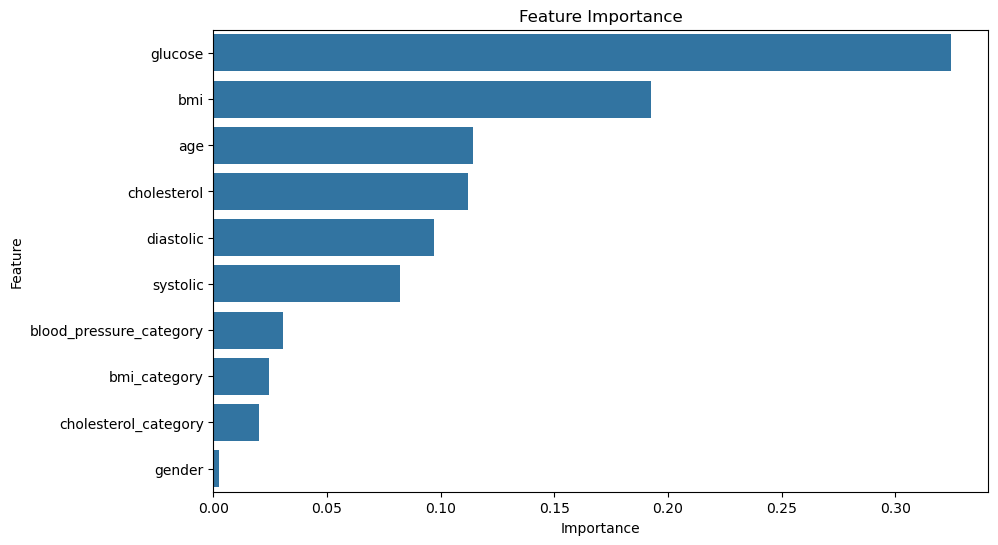

In [85]:

importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns,'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# CONCLUTION

In this project, we built and evaluated several machine learning models to predict diabetes risk based on various health metrics. 
The models we explored included Logistic Regression, Decision Tree, K-Nearest Neighbors, Support Vector Machine, and Random Forest Classifier.


Among these models, the Random Forest Classifier with 100 estimators performed the best, achieving an accuracy of 99.9% on the test set.This high accuracy indicates that the features used in the dataset are highly predictive of the target variable, diabetes risk.

The feature importance analysis revealed that glucose, BMI, age, and cholesterol are the most significant predictors of diabetes risk. 
This insight can be valuable for healthcare professionals to focus on these key metrics when assessing a patient's risk of diabetes.

Overall, the Random Forest Classifier model demonstrated exceptional performance in predicting diabetes risk,
 making it a reliable tool for early detection and prevention of diabetes.